In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
img = cv2.imread('D:/test_pic/1.jpg',1)
cv2.imshow('original',img)
cv2.waitKey(0)

-1

In [2]:
def pinyi_warp_1(img ,tx, ty):#tx,ty-->平移距离
    h, w, c= img.shape
    M=np.float32([[1,0,tx],[0,1,ty]])
    new_img = np.zeros_like(img)
    for y in range(h):
        for x in range(w):
            src_pos = np.array([x,y,1])
            dst_pos = np.dot(M,src_pos)
            dst_x,dst_y = int(dst_pos[0]),int(dst_pos[1])
            if dst_x<0 or dst_x>=w or dst_y <0 or dst_y>=h:
                continue
            new_img[dst_y,dst_x] = img[y,x]
    return new_img
def rotate_warp_1(img,angle):#angle直接输入想要的角度值即可，不必考虑弧度值
    h, w, c= img.shape
    center = (w//2,h//2)
    angle = math.radians(angle)
    cos_angle = math.cos(angle)
    sin_angle = math.sin(angle)
    M = np.array([[cos_angle,-sin_angle,0],[sin_angle,cos_angle,0],[0,0,1]])
    #调整平移部分
    t = np.array([[1,0,center[0]],[0,1,center[1]],[0,0,1]])
    t_inv = np.linalg.inv(t)
    M = np.dot(np.dot(t,M),t_inv)
    new_w = int((h*sin_angle)+(w*cos_angle))
    new_h = int((h*cos_angle)+(w*sin_angle))
    #调整旋转矩阵中的平移部分
    M[0,2]+=new_w/2 - center[0]
    M[1,2]+=new_h/2-center[1]
    new_img = np.zeros((new_h,new_w,img.shape[2]),dtype = np.uint8)
    for y in range(h):
        for x in range(w):
            src_pos = np.array([x,y,1])
            dst_pos = np.dot(M,src_pos)
            dst_x,dst_y = int(dst_pos[0]),int(dst_pos[1])
            if dst_x<0 or dst_x>=new_w or dst_y <0 or dst_y>=new_h:
                continue
            new_img[dst_y,dst_x] = img[y,x]
    return new_img
def rotate_warp_2(img,angle):#angle直接输入想要的角度值即可，不必考虑弧度值
    h, w, c= img.shape
    center = (w//2,h//2)
    angle = math.radians(angle)
    cos_angle = math.cos(angle)
    sin_angle = math.sin(angle)
    M = np.array([[-cos_angle,-sin_angle,0],[-sin_angle,cos_angle,0],[0,0,1]])
    #调整平移部分
    t = np.array([[1,0,center[0]],[0,1,center[1]],[0,0,1]])
    t_inv = np.linalg.inv(t)
    M = np.dot(np.dot(t,M),t_inv)
    new_w = int((h*sin_angle)+(w*cos_angle))
    new_h = int((h*cos_angle)+(w*sin_angle))
    #调整旋转矩阵中的平移部分
    M[0,2]+=new_w/2 - center[0]
    M[1,2]+=new_h/2-center[1]
    new_img = np.zeros((new_h,new_w,img.shape[2]),dtype = np.uint8)
    for y in range(h):
        for x in range(w):
            src_pos = np.array([x,y,1])
            dst_pos = np.dot(M,src_pos)
            dst_x,dst_y = int(dst_pos[0]),int(dst_pos[1])
            if dst_x<0 or dst_x>=new_w or dst_y <0 or dst_y>=new_h:
                continue
            new_img[dst_y,dst_x] = img[y,x]
    return new_img
def sam_distinction(img,tx,ty,theta,lamda): #lamda只能取1或2
    if lamda==1:
        temp_img=pinyi_warp_1(img,tx,ty)
        new_img=rotate_warp_1(temp_img,theta)
    else:
        temp_img=pinyi_warp_1(img,tx,ty)
        new_img=rotate_warp_2(temp_img,theta)
    return new_img

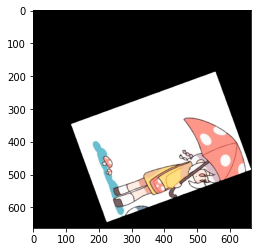

In [3]:
new_img = sam_distinction(img,200,-50,70,1)
new_img_m=cv2.medianBlur(new_img,3)
cv2.imshow('sam_distinction_pic',new_img_m)
cv2.waitKey(0)
img_1 = cv2.cvtColor(new_img_m,cv2.COLOR_BGR2RGB)
plt.imshow(img_1)
plt.show()

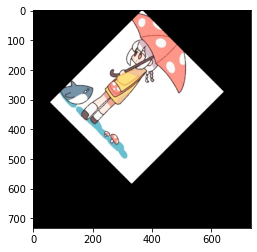

In [4]:
new_img = sam_distinction(img,130,-80,45,2)
new_img_m=cv2.medianBlur(new_img,3)
cv2.imshow('sam_distinction_pic',new_img_m)
cv2.waitKey(0)
img_2 = cv2.cvtColor(new_img_m,cv2.COLOR_BGR2RGB)
plt.imshow(img_2)
plt.show()

In [5]:
def resize_image_2(img,scale_p):
    h, w, c= img.shape
    #直接转换不太行，改成了向上取整会好很多
    new_w = math.ceil(w*scale_p/100)
    new_h = math.ceil(h*scale_p/100)
    Sx=Sy=scale_p/100
    M=np.float32([[Sx,0,0],[0,Sy,0]])
    new_imag = np.zeros((new_h,new_w,3),np.uint8)
    for y in range(h):
        for x in range(w):
            o_p = np.array([x,y,1])
            new_point = M.dot(o_p)
            new_x,new_y = int(new_point[0]),int(new_point[1])
            if new_x<img.shape[1] and new_y <img.shape[0]:
                new_imag[new_y,new_x] = img[y,x]
    return new_imag
def sam_looking(img,tx,ty,theta,lamda,scale):
    if lamda==1:
        temp_img=pinyi_warp_1(img,tx,ty)
        new_img=rotate_warp_1(temp_img,theta)
        new_img=resize_image_2(new_img,scale)
    else:
        temp_img=pinyi_warp_1(img,tx,ty)
        new_img=rotate_warp_2(temp_img,theta)
        new_img=resize_image_2(new_img,scale)
    return new_img

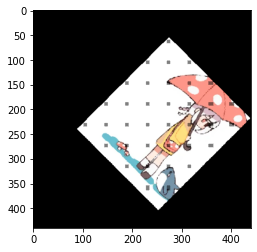

In [6]:
new_img = sam_looking(img,130,-80,45,1,60)
new_img_m = cv2.medianBlur(new_img,3)
cv2.imshow('sam_looking',new_img_m)
cv2.waitKey(0)
img_3 = cv2.cvtColor(new_img_m,cv2.COLOR_BGR2RGB)
plt.imshow(img_3)
plt.show()

In [9]:
def FS_looking(img,tx,ty,theta,lamda,fx_1,fy_1):
    resized_img = cv2.resize(img,None,fx=fx_1,fy=fy_1,interpolation = cv2.INTER_LINEAR)
    new_img = sam_looking(resized_img,tx,ty,theta,lamda,100)
    return new_img

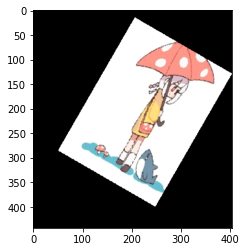

In [11]:
new_img=FS_looking(img,30,-50,30,1,0.5,0.7)
new_img_m = cv2.medianBlur(new_img,3)
cv2.imshow('sam_looking',new_img_m)
cv2.waitKey(0)
img_4 = cv2.cvtColor(new_img_m,cv2.COLOR_BGR2RGB)
plt.imshow(img_4)
plt.show()

In [12]:
def perspect_img(img,src,dst):
    h, w, c= img.shape
    #计算透视变换矩阵
    A = np.zeros((8,9))
    for i in range(4):
        x,y = src[i]
        u,v = dst[i]
        A[2*i] = [-x,-y,-1,0,0,0,u*x,u*y,u]
        A[2*i+1] = [0,0,0,-x,-y,-1,v*x,v*y,v]
    U, S, V = np.linalg.svd(A)
    H = V[-1,:].reshape((3,3))
    new_img = np.zeros((h,w,3),dtype = np.uint8)
    for y in range(h):
        for x in range(w):
            o_p = np.array([x,y,1])
            new_p = H.dot(o_p)
            new_x,new_y,z= new_p/new_p[2]
            if 0<=new_x<w and 0<=new_y<h:
                new_img[int(new_y),int(new_x)] = img[y,x]
    return new_img

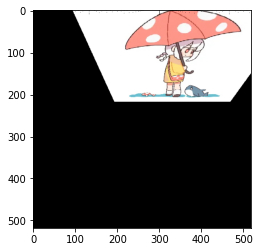

In [13]:
#四个点从左上后=的点开始，顺时针旋转
src_points = np.float32([[200,450],[550,450],[450,200],[200,200]])
dst_points = np.float32([[300,200],[500,200],[500,100],[300,100]])
new_img = perspect_img(img,src_points,dst_points)
cv2.imshow('new',new_img)
cv2.waitKey(0)
img_5 = cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB)
plt.imshow(img_5)
plt.show()